### Training and evaluating a MTS-LSTM with the mean quadrupled error as loss function 
1) Loading and/or adjusting a configuration file

2) Training a MTS-LSTM based on the configuration file 

3) Evaluating the model on the testing period/data (get streamflow simulations)

4) Determine metrics for each test catchment and create a plot with Qobs and Qsim for each catchment (first for daily, then for hourly results)

In [1]:
import pickle
import os
from pathlib import Path
import xarray as xr

import matplotlib.pyplot as plt
import pandas as pd

from neuralhydrology.evaluation import metrics, get_tester
from neuralhydrology.evaluation.evaluate import start_evaluation
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.config import Config

import torch
from ruamel.yaml import YAML  

In [3]:
os.environ['NUMEXPR_NUM_THREADS'] = '8'

import numexpr as ne

In [4]:
print(torch.cuda.get_device_name(0))

NVIDIA GeForce RTX 3090


## Configuration

- fill in work_dir

In [5]:
# specify needed paths
work_dir = Path('C:/Users/kwilbrand/Katharina/My_MTS-LSTM') 
assert work_dir.exists()
os.chdir(work_dir)
os.getcwd()

'C:\\Users\\kwilbrand\\Katharina\\My_MTS-LSTM'

In [7]:
experiment_name = '00_new_loss'  # change name accordingly
config_path = Path("configs/new_loss/" + experiment_name + ".yml")

run_config = Config(config_path)

## Training

In [8]:
start_run(config_file=config_path)

2021-09-25 10:39:42,025: Logging to C:\Users\kwilbrand\Katharina\My_MTS-LSTM\runs\00_new_loss_2509_103942\output.log initialized.
2021-09-25 10:39:42,025: ### Folder structure created at C:\Users\kwilbrand\Katharina\My_MTS-LSTM\runs\00_new_loss_2509_103942
2021-09-25 10:39:42,026: ### Run configurations for 00_new_loss
2021-09-25 10:39:42,026: additional_feature_files: None
2021-09-25 10:39:42,027: allow_subsequent_nan_losses: 10
2021-09-25 10:39:42,027: batch_size: 512
2021-09-25 10:39:42,027: cache_validation_data: True
2021-09-25 10:39:42,028: clip_gradient_norm: 1
2021-09-25 10:39:42,028: clip_targets_to_zero: ['qobs']
2021-09-25 10:39:42,028: data_dir: C:\Users\kwilbrand\Katharina\My_MTS-LSTM\data\europe
2021-09-25 10:39:42,029: dataset: generic
2021-09-25 10:39:42,029: device: cuda:0
2021-09-25 10:39:42,029: dynamic_inputs: ['cp', 'msdwlwrf', 'cape', 'pev', 'press', 'kin', 'd2m', 'temp', 'precip', 'u10', 'v10']
2021-09-25 10:39:42,030: embedding_hiddens: [30, 20, 64]
2021-09-25 1

# Epoch 18: 100%|████████████████████████████████████████████████████████| 25/25 [00:03<00:00,  7.31it/s, Loss: 2.4021]
2021-09-25 10:40:50,951: Epoch 18 average loss: 23.87138862848282
# Epoch 19: 100%|████████████████████████████████████████████████████████| 25/25 [00:03<00:00,  7.29it/s, Loss: 4.0094]
2021-09-25 10:40:54,390: Epoch 19 average loss: 23.459581549167634
2021-09-25 10:40:54,397: Setting learning rate to 5e-05
# Epoch 20: 100%|████████████████████████████████████████████████████████| 25/25 [00:03<00:00,  7.30it/s, Loss: 2.4766]
2021-09-25 10:40:57,822: Epoch 20 average loss: 22.816909976005554
# Validation: 100%|██████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 11.66it/s]
2021-09-25 10:41:00,075: Stored results at C:\Users\kwilbrand\Katharina\My_MTS-LSTM\runs\00_new_loss_2509_103942\validation\model_epoch020\validation_results.p
2021-09-25 10:41:00,081:  -- Median validation metrics:NSE_1D: 0.41158, KGE_1D: 0.61756, RMSE_1D: 0.0198

## Evaluation
- fill in run_dir (printed in output log from training above, "experiment_name_date_time")
- output log is also saved as txt file in run_dir

In [9]:
run_dir = Path("C:/Users/kwilbrand/Katharina/My_MTS-LSTM/runs/00_new_loss_2509_103942")
run_config = Config(Path(config_path))

results30 =  start_evaluation(cfg=run_config, run_dir=run_dir, period='test', epoch=30)
results50 =  start_evaluation(cfg=run_config, run_dir=run_dir, period='test', epoch=50)

2021-09-25 10:44:03,157: Using the model weights from C:\Users\kwilbrand\Katharina\My_MTS-LSTM\runs\00_new_loss_2509_103942\model_epoch030.pt
# Evaluation: 100%|██████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.63it/s]
2021-09-25 10:44:05,065: Stored results at C:\Users\kwilbrand\Katharina\My_MTS-LSTM\runs\00_new_loss_2509_103942\test\model_epoch030\test_results.p
2021-09-25 10:44:05,070: Using the model weights from C:\Users\kwilbrand\Katharina\My_MTS-LSTM\runs\00_new_loss_2509_103942\model_epoch050.pt
# Evaluation: 100%|██████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.93it/s]
2021-09-25 10:44:06,784: Stored results at C:\Users\kwilbrand\Katharina\My_MTS-LSTM\runs\00_new_loss_2509_103942\test\model_epoch050\test_results.p


In [10]:
# Load test_results after epoch 30 and after epoch 50
with open(run_dir / 'test/model_epoch030/test_results.p', 'rb') as f:
    test_results30 = pickle.load(f)
with open(run_dir / 'test/model_epoch050/test_results.p', 'rb') as f:
    test_results50 = pickle.load(f)


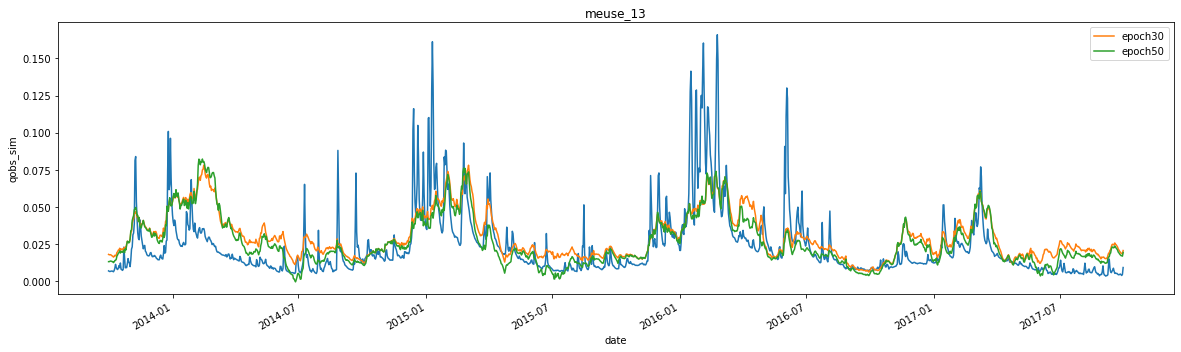

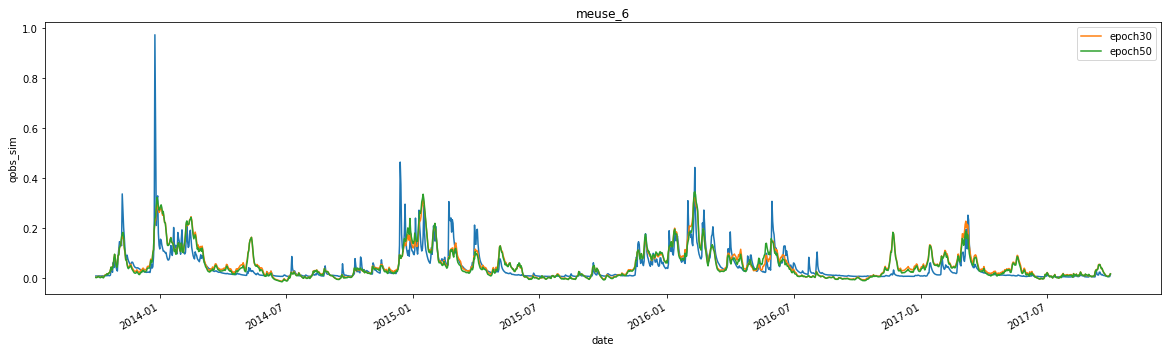

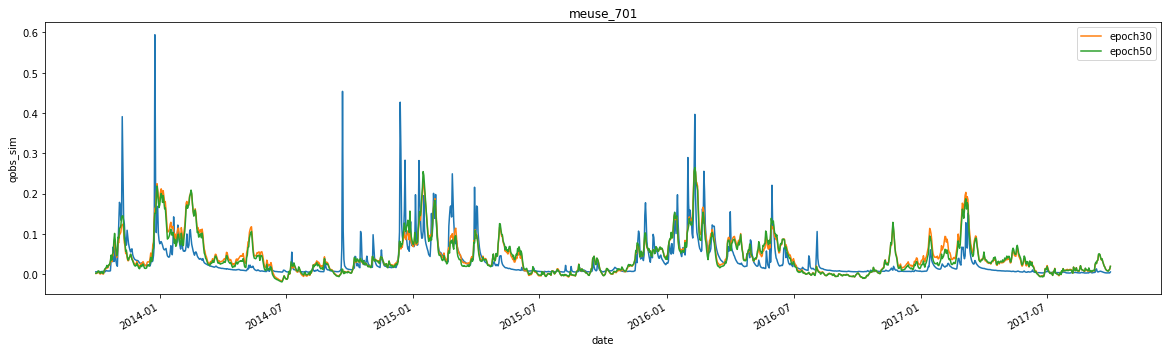

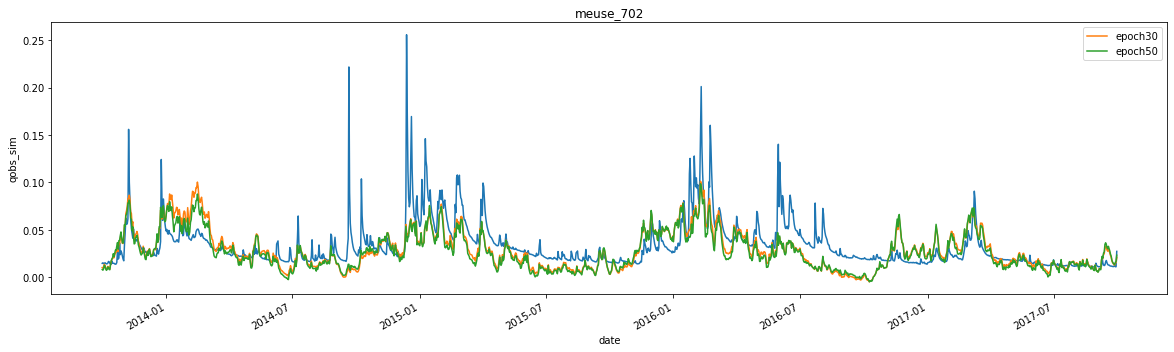

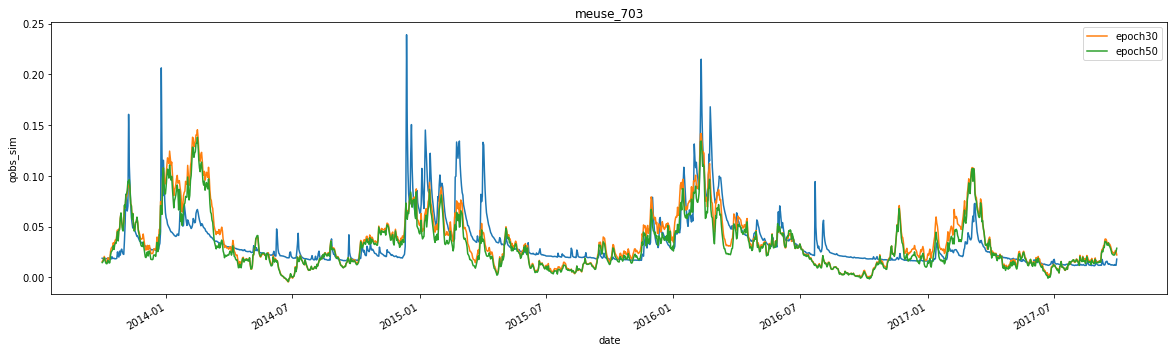

In [21]:
# Plots or daily results to see difference between epoch 30 and 50
for key, item in test_results30.items():
    plt.figure(figsize=(20, 5))
    item['1D']['xr']['qobs_obs'].plot()
    item['1D']['xr']['qobs_sim'].plot(label='epoch30')
    test_results50[key]['1D']['xr']['qobs_sim'].plot(label='epoch50')
    plt.title(key)
    plt.legend()
    plt.show()

### Determine metrics for each test catchment (daily and hourly)
- "results" is nested dictionary: 
- Qobs and Qsim are in xr dataset: results[catchment_ID][frequency]['xr']
- frequency is one of '1D' or '1H'
- fill in correct variable names for Qobs and Qsim 

Daily metrics:


,NSE,MSE,RMSE,KGE,Alpha-NSE,Beta-NSE,Pearson-r,FHV,FMS,FLV,Peak-Timing
meuse_13_30,0.362069,0.000327,0.018089,0.461733,0.673014,0.272718,0.660753,-43.026724,-28.868499,-10.826862,1.142857
meuse_13_50,0.402573,0.000306,0.017506,0.546021,0.731452,0.108830,0.649010,-39.891006,-18.394159,-1036.070818,1.142857
meuse_6_30,0.496720,0.001970,0.044383,0.678143,0.957888,0.140416,0.748515,-12.997020,-10.263489,-794.461258,1.857143
meuse_6_50,0.499926,0.001957,0.044241,0.715960,0.980425,0.095073,0.749776,-8.619182,0.913458,-709.271616,1.714286
meuse_701_30,0.260107,0.001698,0.041202,0.517490,0.971320,0.226069,0.645862,-19.037731,-12.333341,-569.157433,1.833333
meuse_701_50,0.316065,0.001569,0.039614,0.568817,0.951447,0.179370,0.658728,-20.326594,-8.129181,-578.612007,1.333333
meuse_702_30,0.261332,0.000436,0.020877,0.543857,0.838261,-0.210316,0.601392,-35.884829,34.848403,-2020.944340,0.857143
meuse_702_50,0.250361,0.000442,0.021031,0.504091,0.784397,-0.286106,0.603964,-42.409052,37.311461,-2032.989833,0.857143
meuse_703_30,0.303798,0.000462,0.021500,0.669273,1.073026,0.038979,0.678782,-11.518217,30.098647,-2347.406739,1.142857
meuse_703_50,0.341247,0.000437,0.020914,0.653789,0.967841,-0.122865,0.668012,-18.431949,26.143205,-2287.031152,1.142857


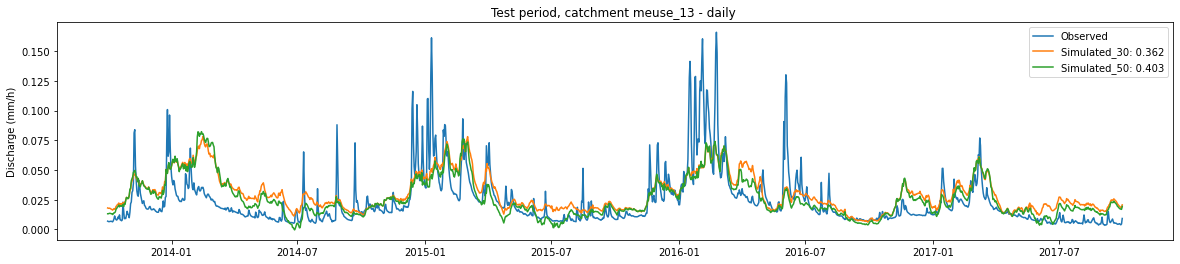

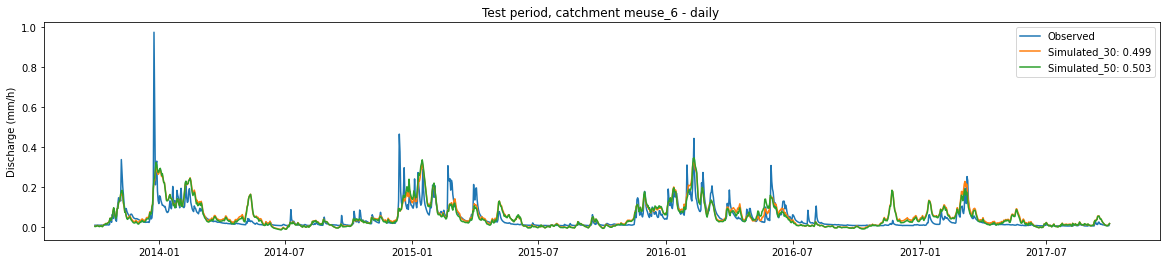

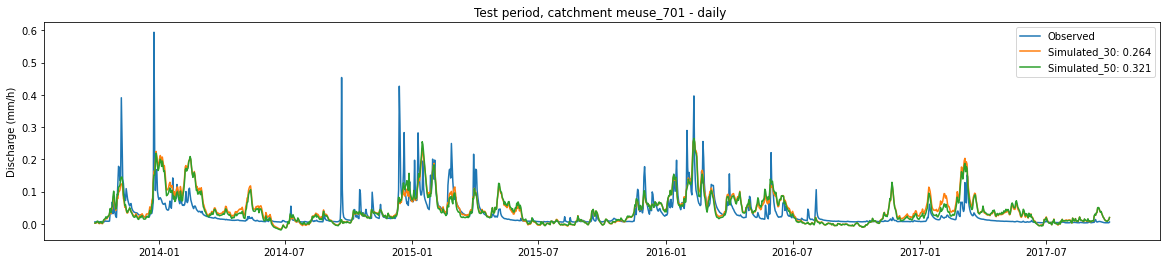

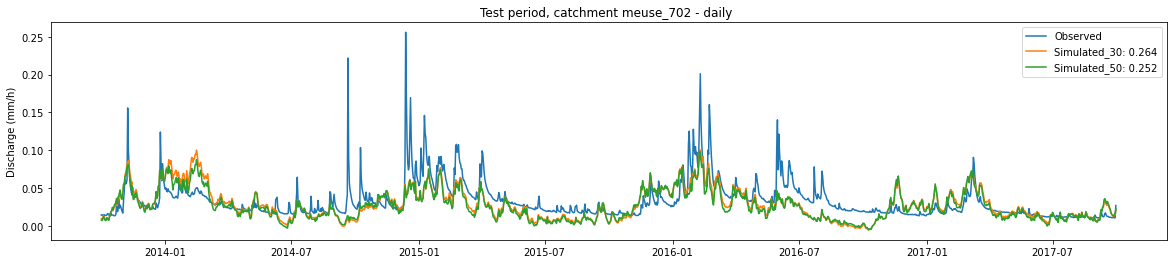

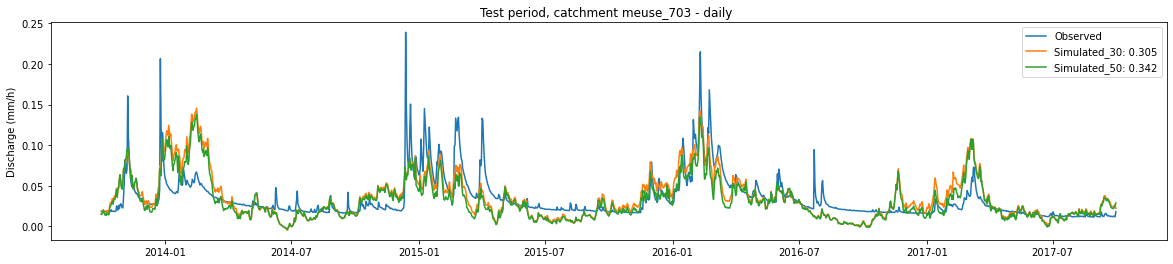

In [26]:
metrics_df = pd.DataFrame()

plot_dir = Path(str(run_dir) + '/time-series_plots')
if plot_dir.exists() == False:
    os.mkdir(plot_dir)

for catchm_ID in test_results30.keys():
    # extract observations and simulations
    daily_qobs = test_results30[catchm_ID]["1D"]["xr"]["qobs_obs"]
    daily_qsim = test_results30[catchm_ID]["1D"]["xr"]["qobs_sim"]
    daily_qsim_50 = test_results50[catchm_ID]["1D"]["xr"]["qobs_sim"]

    fig, ax = plt.subplots(figsize=(20,4))
    ax.plot(daily_qobs["date"], daily_qobs, label="Observed")
    ax.plot(daily_qsim["date"], daily_qsim, label=f"Simulated_30: {test_results30[catchm_ID]['1D']['NSE_1D']:.3f}")
    ax.plot(daily_qsim["date"], daily_qsim_50, label=f"Simulated_50: {test_results50[catchm_ID]['1D']['NSE_1D']:.3f}")
    ax.legend()
    ax.set_ylabel("Discharge (mm/h)")
    ax.set_title(f"Test period, catchment {catchm_ID} - daily ")
    plt.savefig(str(plot_dir) + '/daily_' + catchm_ID)

    # Calculate some metrics
    values = metrics.calculate_all_metrics(daily_qobs.isel(time_step=-1), daily_qsim.isel(time_step=-1))
    df_temp = pd.DataFrame(values, index=[catchm_ID + '_30'])
    metrics_df = metrics_df.append(other=df_temp)

    values = metrics.calculate_all_metrics(daily_qobs.isel(time_step=-1), daily_qsim_50.isel(time_step=-1))
    df_temp = pd.DataFrame(values, index=[catchm_ID + '_50'])
    metrics_df = metrics_df.append(other=df_temp)

#         plt.close(fig)

with open(str(run_dir) + '/metrics_df_daily.pkl', 'wb') as f:
    pickle.dump(metrics_df, f, pickle.DEFAULT_PROTOCOL)

print("Daily metrics:")
metrics_df

Hourly metrics:


,NSE,MSE,RMSE,KGE,Alpha-NSE,Beta-NSE,Pearson-r,FHV,FMS,FLV,Peak-Timing
meuse_13_30,0.386128,0.000323,0.017975,0.541660,0.738654,0.110689,0.638993,-33.342721,-14.992193,-229.241424,5.142857
meuse_13_50,0.402174,0.000315,0.017739,0.574967,0.770239,0.074941,0.649836,-27.605179,-7.574219,-229.419575,4.571429
meuse_6_30,0.636874,0.001500,0.038725,0.733024,0.858676,0.078772,0.803798,-12.899137,-23.076933,-1117.852831,8.500000
meuse_6_50,0.626016,0.001544,0.039299,0.729691,0.829800,-0.022028,0.792401,-16.569919,-16.321911,-918.831386,8.500000
meuse_701_30,0.576562,0.001055,0.032483,0.671387,0.804959,0.080099,0.764596,-24.987639,-23.021717,-815.325371,9.066667
meuse_701_50,0.594397,0.001011,0.031791,0.707102,0.819197,0.025517,0.772788,-22.465998,-17.537600,-755.928903,6.400000
meuse_702_30,0.320982,0.000424,0.020584,0.512949,0.741724,-0.160096,0.604515,-34.808816,5.034108,-1390.845387,6.400000
meuse_702_50,0.323488,0.000422,0.020546,0.499430,0.719976,-0.164093,0.603340,-36.347442,-1.253061,-1405.094066,5.866667
meuse_703_30,0.483248,0.000356,0.018865,0.619044,0.771342,-0.103254,0.705834,-30.387657,-1.953423,-2452.603816,6.000000
meuse_703_50,0.487162,0.000353,0.018794,0.587537,0.730588,-0.185956,0.722364,-32.642212,-6.036664,-2482.841142,4.500000


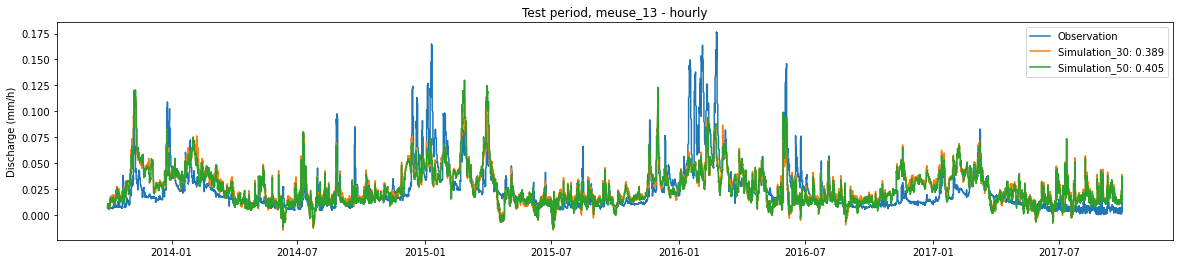

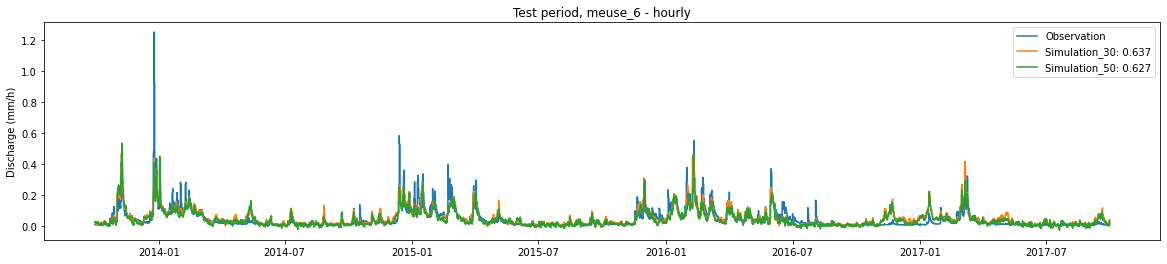

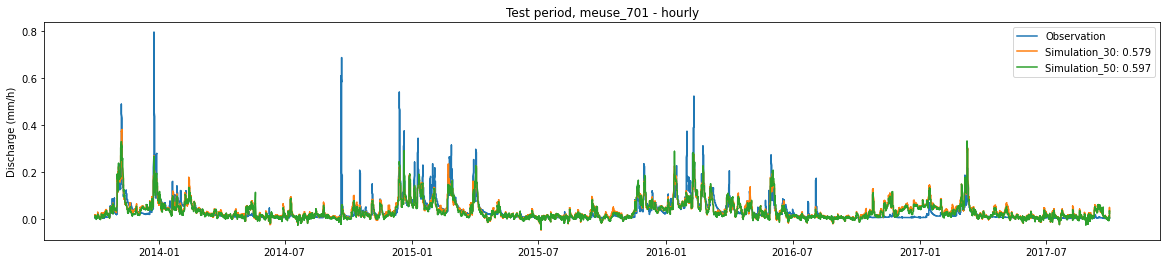

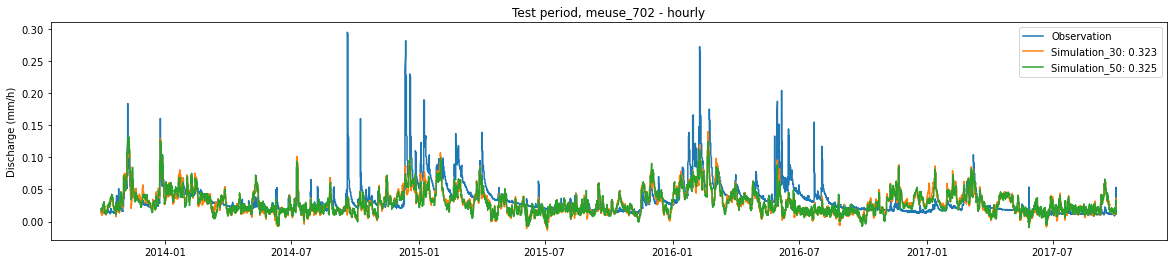

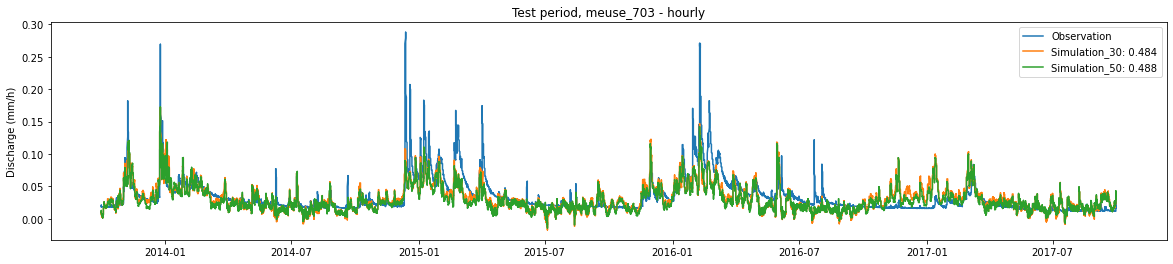

In [27]:
metrics_df = pd.DataFrame()

plot_dir = Path(str(run_dir) + '/time-series_plots')
if plot_dir.exists() == False:
    os.mkdir(plot_dir)

for catchm_ID in test_results30.keys():
    # extract a date slice of observations and simulations
    hourly_xr = test_results30[catchm_ID]["1H"]["xr"]
    hourly_xr_50 = test_results50[catchm_ID]["1H"]["xr"]

    # The hourly data is indexed with two indices: The date (in days) and the time_step (the hour within that day).
    # As we want to get a continuous plot of several days' hours, we select all 24 hours of each day and then stack
    # the two dimensions into one consecutive datetime dimension.
    hourly_xr = hourly_xr.isel(time_step=slice(-24, None)).stack(datetime=['date', 'time_step'])
    hourly_xr['datetime'] = hourly_xr.coords['date'] + hourly_xr.coords['time_step']
    hourly_xr_50 = hourly_xr_50.isel(time_step=slice(-24, None)).stack(datetime=['date', 'time_step'])
    hourly_xr_50['datetime'] = hourly_xr_50.coords['date'] + hourly_xr_50.coords['time_step']

    hourly_qobs = hourly_xr["qobs_obs"]
    hourly_qsim = hourly_xr["qobs_sim"]
    hourly_qsim_50 = hourly_xr_50["qobs_sim"]

    fig, ax = plt.subplots(figsize=(20,4))
    ax.plot(hourly_qobs["datetime"], hourly_qobs, label="Observation")
    ax.plot(hourly_qsim["datetime"], hourly_qsim, label=f"Simulation_30: {test_results30[catchm_ID]['1H']['NSE_1H']:.3f}")
    ax.plot(hourly_qsim_50["datetime"], hourly_qsim_50, label=f"Simulation_50: {test_results50[catchm_ID]['1H']['NSE_1H']:.3f}")
    ax.set_ylabel("Discharge (mm/h)")
    ax.set_title(f"Test period, {catchm_ID} - hourly")
    _ = ax.legend()
    plt.savefig(str(plot_dir) + '/hourly_' + catchm_ID)
#         plt.close(fig)

    values = metrics.calculate_all_metrics(hourly_qobs, hourly_qsim, resolution='1H')
    df_temp = pd.DataFrame(values, index=[catchm_ID + '_30'])
    metrics_df = metrics_df.append(other=df_temp)
    
    values = metrics.calculate_all_metrics(hourly_qobs, hourly_qsim_50, resolution='1H')
    df_temp = pd.DataFrame(values, index=[catchm_ID + '_50'])
    metrics_df = metrics_df.append(other=df_temp)

with open(str(run_dir) + '/metrics_df_hourly.pkl', 'wb') as f:
    pickle.dump(metrics_df, f, pickle.DEFAULT_PROTOCOL)
    
print("Hourly metrics:")
metrics_df